# 准备工作

In [1]:
!git clone https://gitee.com/jianywu/ML_chapter7_dataset.git
!ls ML_chapter7_dataset  

Cloning into 'ML_chapter7_dataset'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.
final  lgb_baseline_version1_chapter7.ipynb  README.md


In [2]:
pip install category_encoders

     |████████████████████████████████| 81kB 5.5MB/s 


In [3]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [4]:
import category_encoders as ce #CatBoostEncoder的相关包

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data 

In [5]:
seed = 42 # for the same data division

kf = KFold(n_splits=5, random_state=seed,shuffle=True)
df_train = pd.read_csv('ML_chapter7_dataset/final/train_final.csv')
df_test = pd.read_csv('ML_chapter7_dataset/final/test_final.csv')

# 数据分析

In [6]:
df_train.describe()

,continuous_annual_inc,continuous_annual_inc_joint,continuous_delinq_2yrs,continuous_dti,continuous_dti_joint,continuous_fico_range_high,continuous_fico_range_low,continuous_funded_amnt,continuous_funded_amnt_inv,continuous_inq_last_6mths,continuous_installment,continuous_int_rate,continuous_last_fico_range_high,continuous_last_fico_range_low,continuous_loan_amnt,loan_status,continuous_mths_since_last_delinq,continuous_mths_since_last_major_derog,continuous_mths_since_last_record,continuous_open_acc,continuous_pub_rec,discrete_addr_state_1_one_hot,discrete_addr_state_2_one_hot,discrete_addr_state_3_one_hot,discrete_addr_state_4_one_hot,discrete_addr_state_5_one_hot,discrete_addr_state_6_one_hot,discrete_addr_state_7_one_hot,discrete_addr_state_8_one_hot,discrete_addr_state_9_one_hot,discrete_addr_state_10_one_hot,discrete_addr_state_11_one_hot,discrete_addr_state_12_one_hot,discrete_addr_state_13_one_hot,discrete_addr_state_14_one_hot,discrete_addr_state_15_one_hot,discrete_addr_state_16_one_hot,discrete_addr_state_17_one_hot,discrete_addr_state_18_one_hot,discrete_addr_state_19_one_hot,...,discrete_purpose_11_one_hot,discrete_purpose_12_one_hot,discrete_pymnt_plan_1_one_hot,discrete_sub_grade_1_one_hot,discrete_sub_grade_2_one_hot,discrete_sub_grade_3_one_hot,discrete_sub_grade_4_one_hot,discrete_sub_grade_5_one_hot,discrete_sub_grade_6_one_hot,discrete_sub_grade_7_one_hot,discrete_sub_grade_8_one_hot,discrete_sub_grade_9_one_hot,discrete_sub_grade_10_one_hot,discrete_sub_grade_11_one_hot,discrete_sub_grade_12_one_hot,discrete_sub_grade_13_one_hot,discrete_sub_grade_14_one_hot,discrete_sub_grade_15_one_hot,discrete_sub_grade_16_one_hot,discrete_sub_grade_17_one_hot,discrete_sub_grade_18_one_hot,discrete_sub_grade_19_one_hot,discrete_sub_grade_20_one_hot,discrete_sub_grade_21_one_hot,discrete_sub_grade_22_one_hot,discrete_sub_grade_23_one_hot,discrete_sub_grade_24_one_hot,discrete_sub_grade_25_one_hot,discrete_sub_grade_26_one_hot,discrete_sub_grade_27_one_hot,discrete_sub_grade_28_one_hot,discrete_sub_grade_29_one_hot,discrete_sub_grade_30_one_hot,discrete_sub_grade_31_one_hot,discrete_sub_grade_32_one_hot,discrete_sub_grade_33_one_hot,discrete_sub_grade_34_one_hot,discrete_sub_grade_35_one_hot,discrete_term_1_one_hot,discrete_term_2_one_hot
count,5.000000e+04,220.000000,50000.00000,49999.000000,220.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,26083.000000,15052.000000,9495.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,7.835886e+04,109248.802545,0.34738,19.080239,18.831864,698.404460,694.404300,14332.53650,14325.533000,0.620820,428.892109,11.986125,675.644860,658.428400,14332.53650,0.795760,34.197485,44.214589,65.500790,11.944960,0.252820,0.033880,0.002000,0.038880,0.033380,0.018000,0.012260,0.004400,0.02756,0.137380,0.028700,0.025140,0.016960,0.023600,0.08170,0.083120,0.008160,0.005800,0.012500,0.019380,...,0.006040,0.000520,1.0,0.056600,0.065920,0.067100,0.005860,0.055120,0.061300,0.056820,0.030020,0.064140,0.059300,0.015560,0.036840,0.012960,0.041540,0.044880,0.02210,0.003780,0.036220,0.066360,0.023940,0.017880,0.05160,0.004620,0.009440,0.027920,0.016740,0.002320,0.008180,0.028180,0

In [7]:
df_train.columns.values

array(['continuous_annual_inc', 'continuous_annual_inc_joint',
       'continuous_delinq_2yrs', 'continuous_dti', 'continuous_dti_joint',
       'continuous_fico_range_high', 'continuous_fico_range_low',
       'continuous_funded_amnt', 'continuous_funded_amnt_inv',
       'continuous_inq_last_6mths', 'continuous_installment',
       'continuous_int_rate', 'continuous_last_fico_range_high',
       'continuous_last_fico_range_low', 'continuous_loan_amnt',
       'loan_status', 'continuous_mths_since_last_delinq',
       'continuous_mths_since_last_major_derog',
       'continuous_mths_since_last_record', 'continuous_open_acc',
       'continuous_pub_rec', 'discrete_addr_state_1_one_hot',
       'discrete_addr_state_2_one_hot', 'discrete_addr_state_3_one_hot',
       'discrete_addr_state_4_one_hot', 'discrete_addr_state_5_one_hot',
       'discrete_addr_state_6_one_hot', 'discrete_addr_state_7_one_hot',
       'discrete_addr_state_8_one_hot', 'discrete_addr_state_9_one_hot',
       'disc

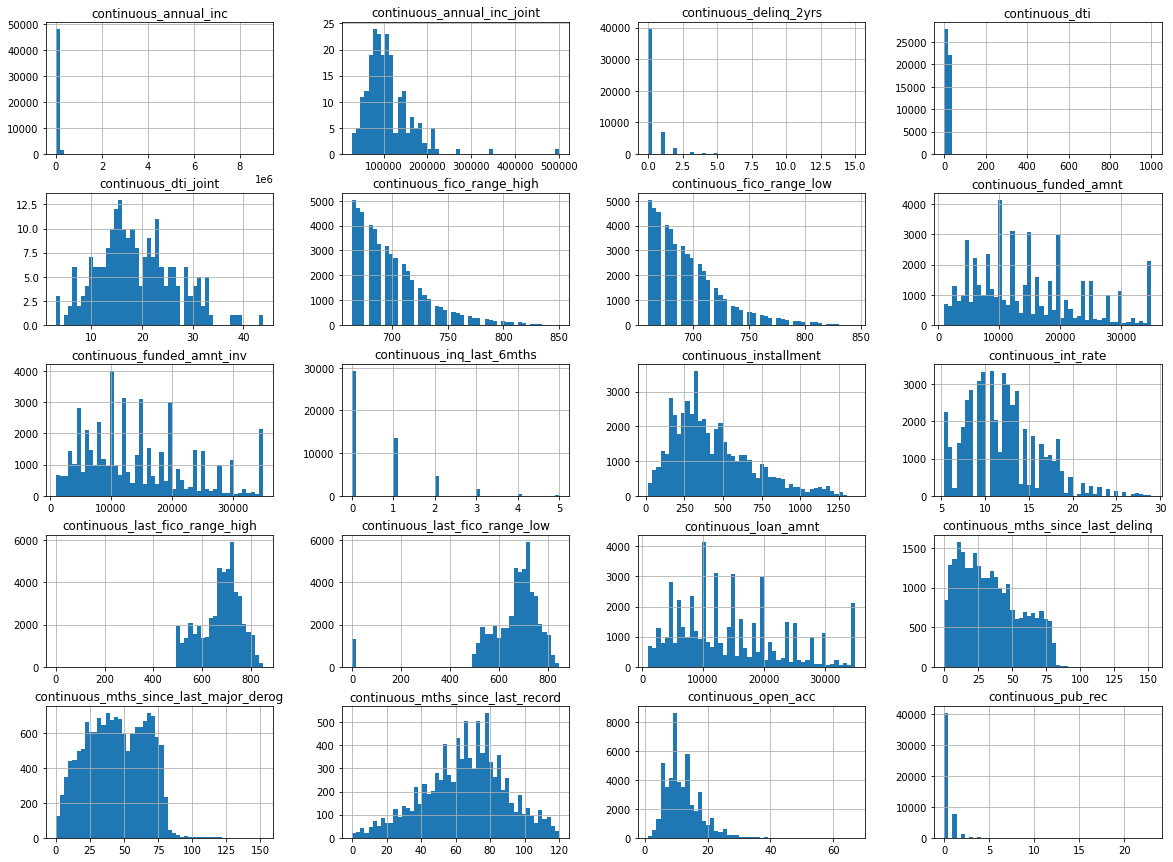

In [8]:
import matplotlib.pyplot as plt
onehotlabels=['discrete_addr_state_1_one_hot',
       'discrete_addr_state_2_one_hot', 'discrete_addr_state_3_one_hot',
       'discrete_addr_state_4_one_hot', 'discrete_addr_state_5_one_hot',
       'discrete_addr_state_6_one_hot', 'discrete_addr_state_7_one_hot',
       'discrete_addr_state_8_one_hot', 'discrete_addr_state_9_one_hot',
       'discrete_addr_state_10_one_hot', 'discrete_addr_state_11_one_hot',
       'discrete_addr_state_12_one_hot', 'discrete_addr_state_13_one_hot',
       'discrete_addr_state_14_one_hot', 'discrete_addr_state_15_one_hot',
       'discrete_addr_state_16_one_hot', 'discrete_addr_state_17_one_hot',
       'discrete_addr_state_18_one_hot', 'discrete_addr_state_19_one_hot',
       'discrete_addr_state_20_one_hot', 'discrete_addr_state_21_one_hot',
       'discrete_addr_state_22_one_hot', 'discrete_addr_state_23_one_hot',
       'discrete_addr_state_24_one_hot', 'discrete_addr_state_25_one_hot',
       'discrete_addr_state_26_one_hot', 'discrete_addr_state_27_one_hot',
       'discrete_addr_state_28_one_hot', 'discrete_addr_state_29_one_hot',
       'discrete_addr_state_30_one_hot', 'discrete_addr_state_31_one_hot',
       'discrete_addr_state_32_one_hot', 'discrete_addr_state_33_one_hot',
       'discrete_addr_state_34_one_hot', 'discrete_addr_state_35_one_hot',
       'discrete_addr_state_36_one_hot', 'discrete_addr_state_37_one_hot',
       'discrete_addr_state_38_one_hot', 'discrete_addr_state_39_one_hot',
       'discrete_addr_state_40_one_hot', 'discrete_addr_state_41_one_hot',
       'discrete_addr_state_42_one_hot', 'discrete_addr_state_43_one_hot',
       'discrete_addr_state_44_one_hot', 'discrete_addr_state_45_one_hot',
       'discrete_addr_state_46_one_hot', 'discrete_addr_state_47_one_hot',
       'discrete_addr_state_48_one_hot', 'discrete_addr_state_49_one_hot',
       'discrete_application_type_1_one_hot',
       'discrete_application_type_2_one_hot',
       'discrete_emp_length_1_one_hot', 'discrete_emp_length_2_one_hot',
       'discrete_emp_length_3_one_hot', 'discrete_emp_length_4_one_hot',
       'discrete_emp_length_5_one_hot', 'discrete_emp_length_6_one_hot',
       'discrete_emp_length_7_one_hot', 'discrete_emp_length_8_one_hot',
       'discrete_emp_length_9_one_hot', 'discrete_emp_length_10_one_hot',
       'discrete_emp_length_11_one_hot', 'discrete_emp_length_12_one_hot',
       'discrete_grade_1_one_hot', 'discrete_grade_2_one_hot',
       'discrete_grade_3_one_hot', 'discrete_grade_4_one_hot',
       'discrete_grade_5_one_hot', 'discrete_grade_6_one_hot',
       'discrete_grade_7_one_hot', 'discrete_home_ownership_1_one_hot',
       'discrete_home_ownership_2_one_hot',
       'discrete_home_ownership_3_one_hot',
       'discrete_home_ownership_4_one_hot',
       'discrete_policy_code_1_one_hot', 'discrete_purpose_1_one_hot',
       'discrete_purpose_2_one_hot', 'discrete_purpose_3_one_hot',
       'discrete_purpose_4_one_hot', 'discrete_purpose_5_one_hot',
       'discrete_purpose_6_one_hot', 'discrete_purpose_7_one_hot',
       'discrete_purpose_8_one_hot', 'discrete_purpose_9_one_hot',
       'discrete_purpose_10_one_hot', 'discrete_purpose_11_one_hot',
       'discrete_purpose_12_one_hot', 'discrete_pymnt_plan_1_one_hot',
       'discrete_sub_grade_1_one_hot', 'discrete_sub_grade_2_one_hot',
       'discrete_sub_grade_3_one_hot', 'discrete_sub_grade_4_one_hot',
       'discrete_sub_grade_5_one_hot', 'discrete_sub_grade_6_one_hot',
       'discrete_sub_grade_7_one_hot', 'discrete_sub_grade_8_one_hot',
       'discrete_sub_grade_9_one_hot', 'discrete_sub_grade_10_one_hot',
       'discrete_sub_grade_11_one_hot', 'discrete_sub_grade_12_one_hot',
       'discrete_sub_grade_13_one_hot', 'discrete_sub_grade_14_one_hot',
       'discrete_sub_grade_15_one_hot', 'discrete_sub_grade_16_one_hot',
       'discrete_sub_grade_17_one_hot', 'discrete_sub_grade_18_one_hot',
       'discrete_sub_grade_19_one_hot', 'discrete_sub_grade_20_one_hot',
       'discrete_sub_grade_21_one_hot', 'discrete_sub_grade_22_one_hot',
       'discrete_sub_grade_23_one_hot', 'discrete_sub_grade_24_one_hot',
       'discrete_sub_grade_25_one_hot', 'discrete_sub_grade_26_one_hot',
       'discrete_sub_grade_27_one_hot', 'discrete_sub_grade_28_one_hot',
       'discrete_sub_grade_29_one_hot', 'discrete_sub_grade_30_one_hot',
       'discrete_sub_grade_31_one_hot', 'discrete_sub_grade_32_one_hot',
       'discrete_sub_grade_33_one_hot', 'discrete_sub_grade_34_one_hot',
       'discrete_sub_grade_35_one_hot', 'discrete_term_1_one_hot',
       'discrete_term_2_one_hot','loan_status']
showdf_train=df_train.drop(columns=onehotlabels)
showdf_train.hist(bins=50,figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f278abb6bd0>,
      dtype=object)

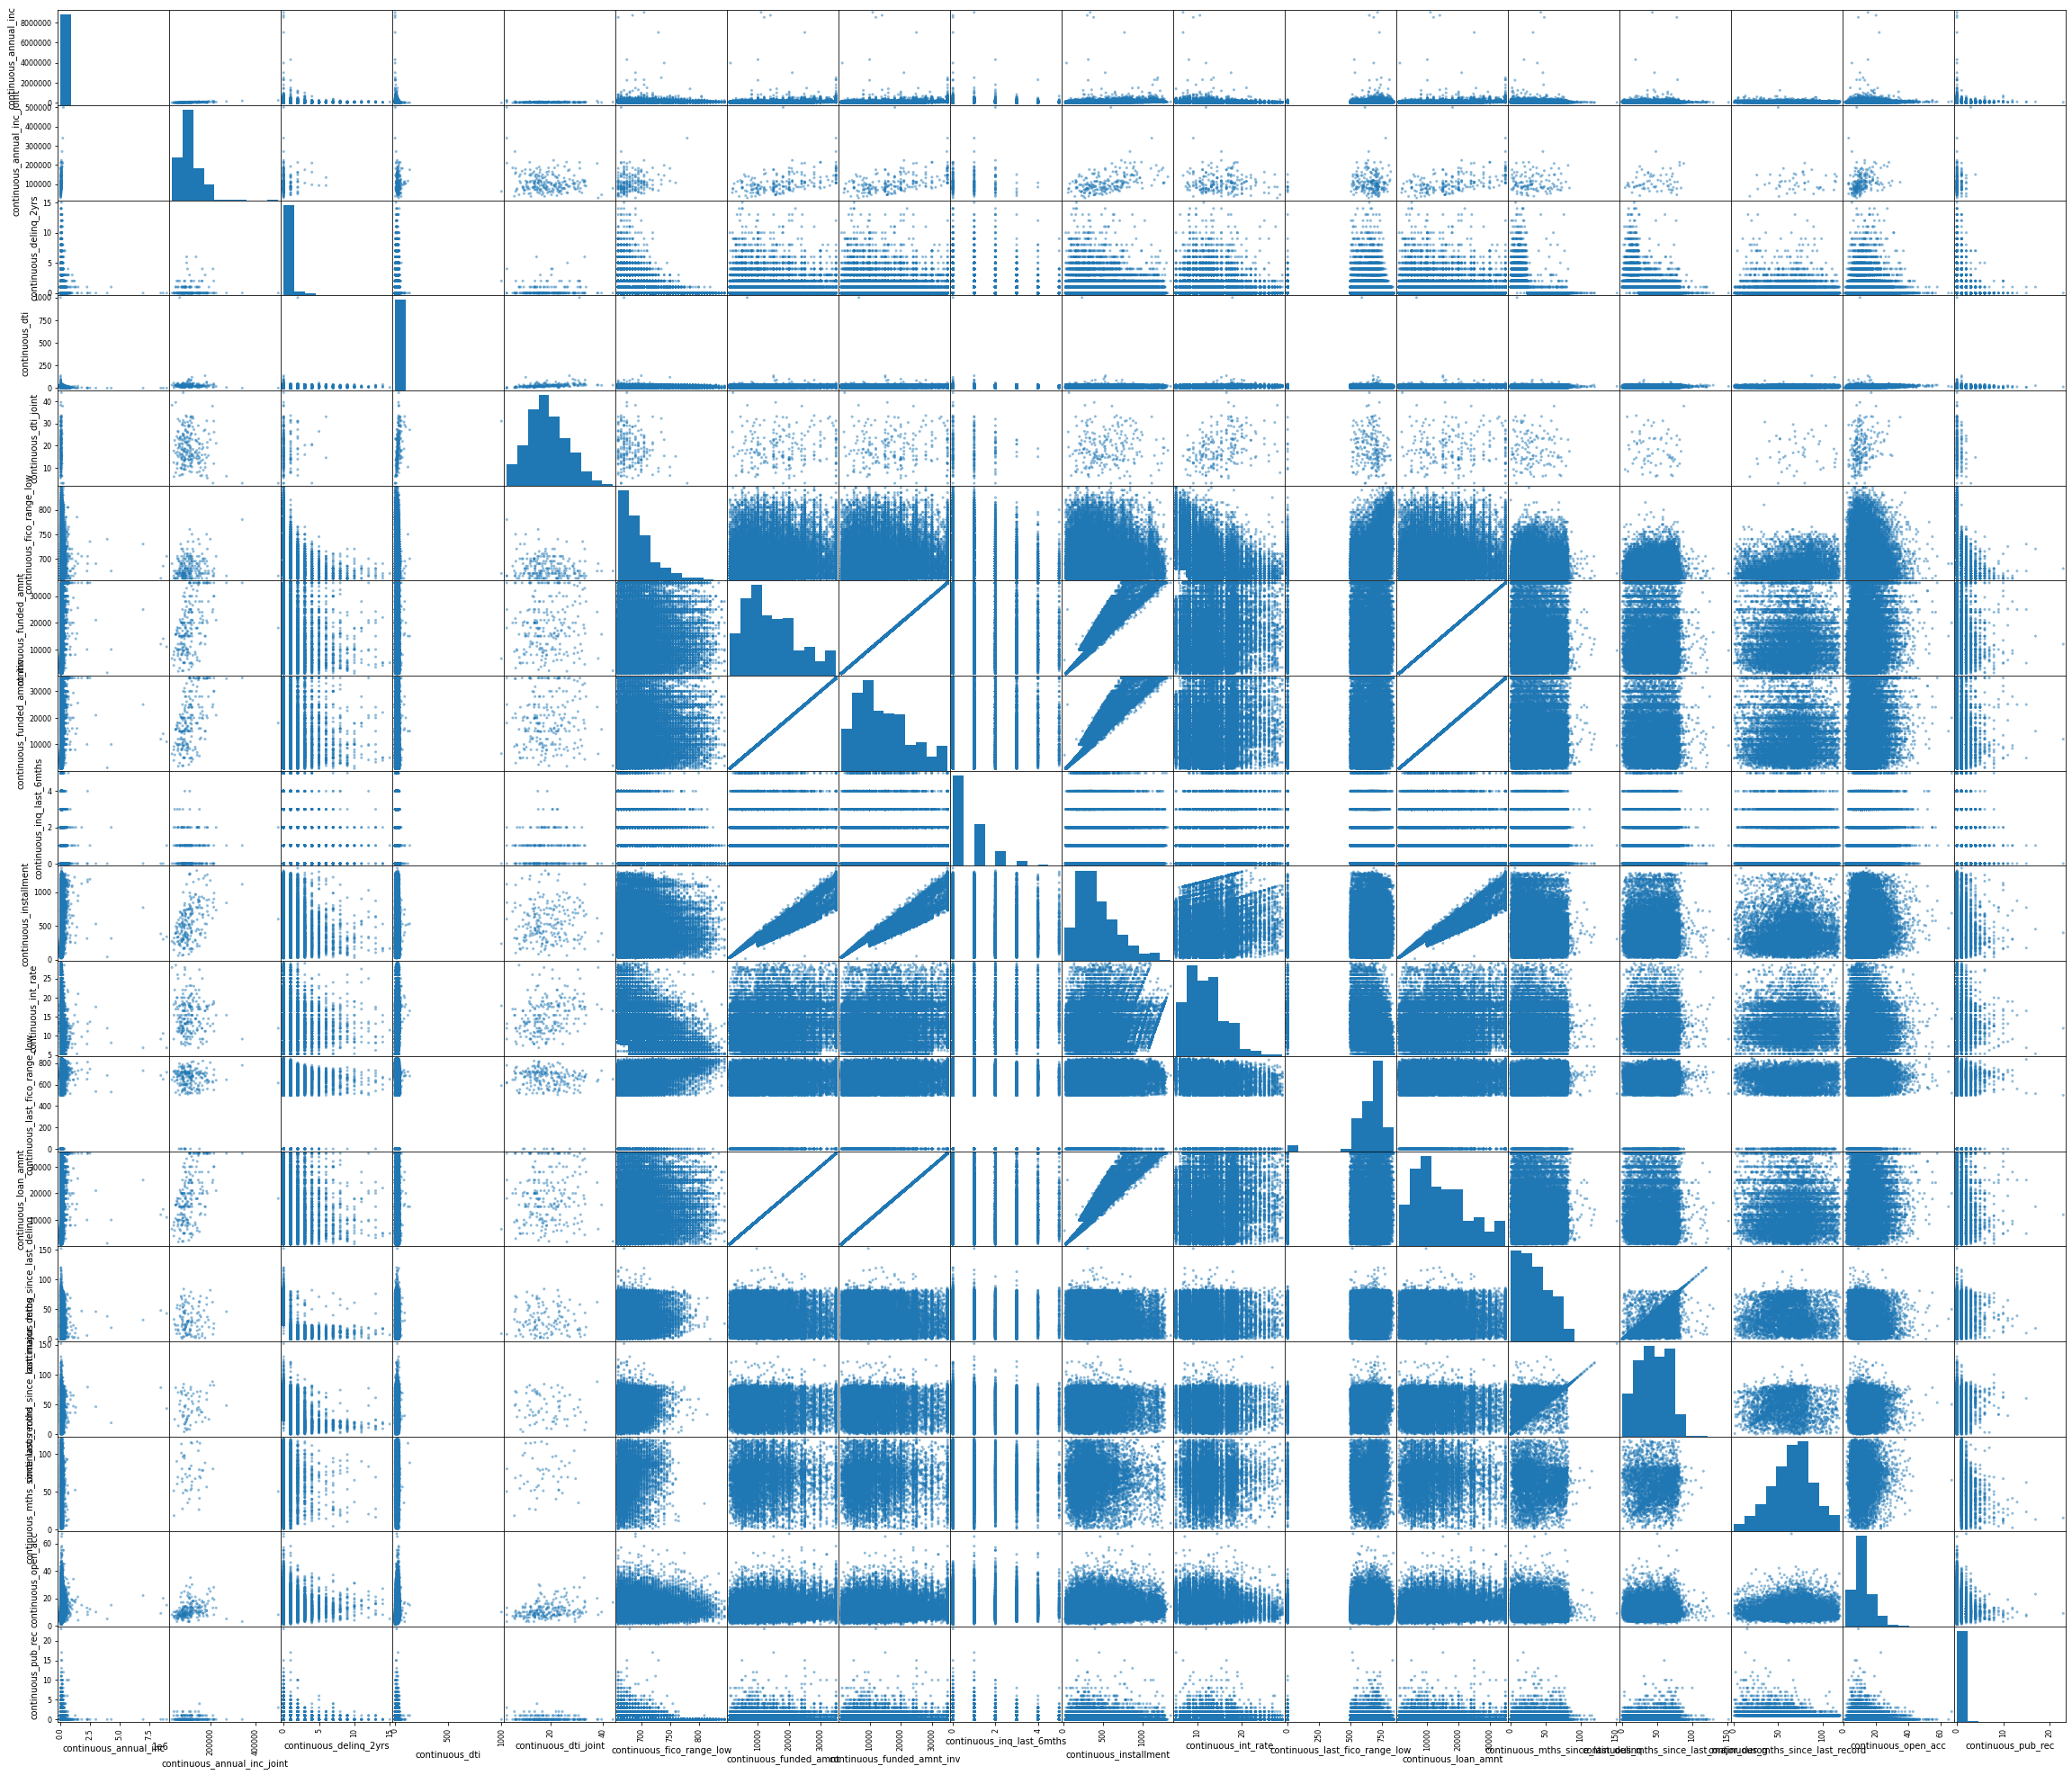

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(showdf_train.drop(columns=['continuous_fico_range_high','continuous_last_fico_range_high']),figsize=(40,35))

# BaseLine

## data preprocessing

In [10]:
X_train = df_train.drop(columns=['loan_status']).values
Y_train = df_train['loan_status'].values.astype(int)
X_test = df_test.drop(columns=['loan_status']).values
Y_test = df_test['loan_status'].values.astype(int)

# split data for five fold

five_fold_data = []

for train_index, eval_index in kf.split(X_train):
    x_train, x_eval = X_train[train_index], X_train[eval_index]
    y_train, y_eval = Y_train[train_index], Y_train[eval_index]
    
    five_fold_data.append([(x_train, y_train), (x_eval, y_eval)])

In [11]:
X_train.shape, Y_train.shape

((50000, 145), (50000,))

## Algorithm

In [12]:
def get_model(param):
    model_list = []
    for idx, [(x_train, y_train), (x_eval, y_eval)] in enumerate(five_fold_data):
        print('{}-th model is training:'.format(idx))
        train_data = lgb.Dataset(x_train, label=y_train)
        validation_data = lgb.Dataset(x_eval, label=y_eval)
        bst = lgb.train(param, train_data, valid_sets=[validation_data])
        model_list.append(bst)
    return model_list

## Train

In [13]:
param_base = {'num_leaves': 31, 'objective': 'binary', 'metric': 'binary', 'num_round':1000}

param_fine_tuning = {'num_thread': 8,'num_leaves': 128, 'metric': 'binary', 'objective': 'binary', 'num_round': 1000, 
                     'learning_rate': 3e-3, 'feature_fraction': 0.6, 'bagging_fraction': 0.8}

In [14]:
# base param train
param_base_model = get_model(param_base)

# param fine tuning
param_fine_tuning_model = get_model(param_fine_tuning)

0-th model is training:


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[5]	valid_0's binary_logloss: 0.499498
[6]	valid_0's binary_logloss: 0.497659
[7]	valid_0's binary_logloss: 0.49584
[8]	valid_0's binary_logloss: 0.494033
[9]	valid_0's binary_logloss: 0.492254
[10]	valid_0's binary_logloss: 0.491941
[11]	valid_0's binary_logloss: 0.490211
[12]	valid_0's binary_logloss: 0.488466
[13]	valid_0's binary_logloss: 0.486737
[14]	valid_0's binary_logloss: 0.485043
[15]	valid_0's binary_logloss: 0.484723
[16]	valid_0's binary_logloss: 0.483066
[17]	valid_0's binary_logloss: 0.481415
[18]	valid_0's binary_logloss: 0.479759
[19]	valid_0's binary_logloss: 0.478125
[20]	valid_0's binary_logloss: 0.477819
[21]	valid_0's binary_logloss: 0.476211
[22]	valid_0's binary_logloss: 0.474603
[23]	valid_0's binary_logloss: 0.473019
[24]	valid_0's binary_logloss: 0.471441
[25]	valid_0's binary_logloss: 0.4699
[26]	valid_0's binary_logloss: 0.468355
[27]	valid_0's binary_logloss: 0.466821
[28]	valid_0's binary_logloss: 0.4665

## Test

In [15]:
def test_model(model_list):
    data = X_test
    five_fold_pred = np.zeros((5, len(X_test)))
    for i, bst in enumerate(model_list):
        ypred = bst.predict(data, num_iteration=bst.best_iteration)
        five_fold_pred[i] = ypred
    ypred_mean = (five_fold_pred.mean(axis=-2)>0.5).astype(int)
    return accuracy_score(ypred_mean, Y_test)

In [16]:
base_score = test_model(param_base_model)
fine_tuning_score = test_model(param_fine_tuning_model)

print('base: {}, fine tuning: {}'.format(base_score, fine_tuning_score))

base: 0.91584, fine tuning: 0.91762


# 添加衍生变量

## CatBoostEncoder

In [17]:
#Create the encoder
target_enc = ce.CatBoostEncoder(cols='continuous_open_acc')
target_enc.fit(df_train['continuous_open_acc'], df_train['loan_status'])
#Transform the features, rename columns with _cb suffix, and join to dataframe
train_CBE = df_train.join(target_enc.transform(df_train['continuous_open_acc']).add_suffix('_cb'))
test_CBE = df_test.join(target_enc.transform(df_test['continuous_open_acc']).add_suffix('_cb'))

### data preprocessing

In [18]:
X_train = train_CBE.drop(columns=['loan_status']).values
Y_train = train_CBE['loan_status'].values.astype(int)
X_test = test_CBE.drop(columns=['loan_status']).values
Y_test = test_CBE['loan_status'].values.astype(int)

# split data for five fold

five_fold_data = []

for train_index, eval_index in kf.split(X_train):
    x_train, x_eval = X_train[train_index], X_train[eval_index]
    y_train, y_eval = Y_train[train_index], Y_train[eval_index]
    
    five_fold_data.append([(x_train, y_train), (x_eval, y_eval)])

### Algorithm

In [19]:
def get_model(param):
    model_list = []
    for idx, [(x_train, y_train), (x_eval, y_eval)] in enumerate(five_fold_data):
        print('{}-th model is training:'.format(idx))
        train_data = lgb.Dataset(x_train, label=y_train)
        validation_data = lgb.Dataset(x_eval, label=y_eval)
        bst = lgb.train(param, train_data, valid_sets=[validation_data])
        model_list.append(bst)
    return model_list

### Train

In [20]:
param_base = {'num_leaves': 31, 'objective': 'binary', 'metric': 'binary', 'num_round':1000}

param_fine_tuning = {'num_thread': 8,'num_leaves': 128, 'metric': 'binary', 'objective': 'binary', 'num_round': 1000, 
                     'learning_rate': 3e-3, 'feature_fraction': 0.6, 'bagging_fraction': 0.8}

param_fine_tuningfinal={'num_thread': 8,'num_leaves': 128, 'metric': 'binary', 'objective': 'binary', 'num_round': 1200, 
                     'learning_rate': 3e-3, 'feature_fraction': 0.6, 'bagging_fraction': 0.8}

In [21]:
# base param train
param_base_model = get_model(param_base)

# param fine tuning
param_fine_tuning_model = get_model(param_fine_tuning)


param_fine_tuningfinal_model = get_model(param_fine_tuningfinal)

0-th model is training:


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[1005]	valid_0's binary_logloss: 0.204299
[1006]	valid_0's binary_logloss: 0.204273
[1007]	valid_0's binary_logloss: 0.204253
[1008]	valid_0's binary_logloss: 0.204225
[1009]	valid_0's binary_logloss: 0.204205
[1010]	valid_0's binary_logloss: 0.204178
[1011]	valid_0's binary_logloss: 0.204155
[1012]	valid_0's binary_logloss: 0.204133
[1013]	valid_0's binary_logloss: 0.204124
[1014]	valid_0's binary_logloss: 0.204099
[1015]	valid_0's binary_logloss: 0.204077
[1016]	valid_0's binary_logloss: 0.204076
[1017]	valid_0's binary_logloss: 0.204059
[1018]	valid_0's binary_logloss: 0.20404
[1019]	valid_0's binary_logloss: 0.204021
[1020]	valid_0's binary_logloss: 0.203995
[1021]	valid_0's binary_logloss: 0.203977
[1022]	valid_0's binary_logloss: 0.203961
[1023]	valid_0's binary_logloss: 0.203941
[1024]	valid_0's binary_logloss: 0.203938
[1025]	valid_0's binary_logloss: 0.203926
[1026]	valid_0's binary_logloss: 0.203904
[1027]	valid_0's binary_lo

### Test

In [22]:
def test_model(model_list):
    data = X_test
    five_fold_pred = np.zeros((5, len(X_test)))
    for i, bst in enumerate(model_list):
        ypred = bst.predict(data, num_iteration=bst.best_iteration)
        five_fold_pred[i] = ypred
    ypred_mean = (five_fold_pred.mean(axis=-2)>0.5).astype(int)
    return accuracy_score(ypred_mean, Y_test)

In [23]:
base_score = test_model(param_base_model)
fine_tuning_score = test_model(param_fine_tuning_model)
fine_tuningfinal_score=test_model(param_fine_tuningfinal_model)

print('base: {}, fine tuning: {} , fine tuning final: {}'.format(base_score, fine_tuning_score, fine_tuningfinal_score))

base: 0.91568, fine tuning: 0.91774 , fine tuning final: 0.91796
